<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/eda/exa1-26-sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

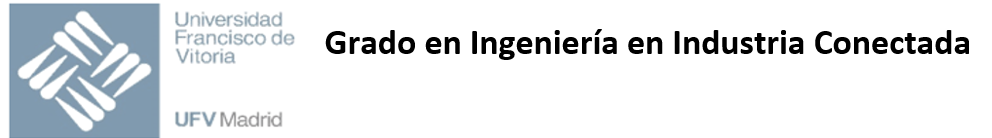

#Examen Parcial Análisis de datos I 13 Octubre 2025  
Parte 2 Problemas (6.4 ptos)  
tiempo: 60 minutos

NOMBRE:   


In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # data visualization

In [18]:
data = pd.read_csv("https://drive.google.com/uc?id=1wX7CmxGvEbenpSgNQ-Pt507jusYx2J8F")
data.head()
data.shape

(13393, 12)

##Análisis Exploratorio

1.-  0.4 pto  
a) Eliminar la columna gender en el dataframe original  
b) imprimir  la edad mínima  
c)imprimir la edad máxima  
d) imprimir la media de cada columa?

In [3]:
#a) Eliminar la columna gender en el dataframe original
data = data.drop('gender', axis=1)
print(data.head())
#b) imprimir la edad mínima
print("Edad mínima:", data['age'].min())
#c)imprimir la edad máxima
print("Edad máxima:", data['age'].max())
#d) imprimir la media de cada columa numerica?
print("Media de cada columna numérica:")
print(data.select_dtypes(include=['number']).mean())


    age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0  27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1  25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2  31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3  32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4  28.0      173.8      67.70        17.1       70.0     127.0       43.5   

   sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0                     18.4            60.0          217.0     C  
1                     16.3            53.0          229.0     A  
2                     12.0            49.0          181.0     C  
3                     15.2            53.0          219.0     B  
4                     27.1            45.0          217.0     B  
Edad mínima: 21.0
Edad máxima: 64.0
Media de cada columna numérica:
age                         36.775106
height_cm                  168.5598

2   0.4 pto  
a) Cúantos *elementos* de clase tipo A existen ?   
b)Cúal es el peso mas frecuente?  
c)Cúal es la estatura mas frecuente ?  
d)Cúal es el porcentaje de grasa en el cuerpo mas frecuente ?

In [4]:
#a) Cúantos elementos de clase tipo A existen ?
print(data[data['class'] == 'A']['class'].count())
#b)Cúal es el peso mas frecuente?
print(data['weight_kg'].mode()[0])
#c)Cúal es la estatura mas frecuente ?
print(data['height_cm'].mode()[0])
#d)Cúal es el porcentaje de grasa en el cuerpo mas frecuente ?
print(data['body fat_%'].mode()[0])

3348
70.5
170.0
23.1


3.-   0.4 pto  
a) Existen valores nulos en el conjunto ? y si los hay cuántos son  
b) Existen duplicados?  
c) Eliminar tanto los nulos y los duplicados si es el caso

In [5]:
#a) Existen valores nulos en el conjunto ? y si los hay cuántos son
print("Valores nulos por cada columna\n",data.isnull().sum())
print("Valores nulos en el conjunto:", data.isnull().sum().sum())
#b) Existen duplicados?
print("duplicados: ",data.duplicated().sum())
#c) Eliminar tanto los nulos y los duplicados si es el caso
data = data.dropna()
data = data.drop_duplicates()
print("tamaño de data ahora: ",data.shape)

Valores nulos por cada columna
 age                        0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64
Valores nulos en el conjunto: 0
duplicados:  1
tamaño de data ahora:  (13392, 11)


4,.   0.4 pto  
a) Realizar un histograma de la variable peso  
b) Realizar un historama de la variable estatura  
c) Existe una distribución normal para cada variable?  
d) Existe sesgo en alguna de estas dos variables ?

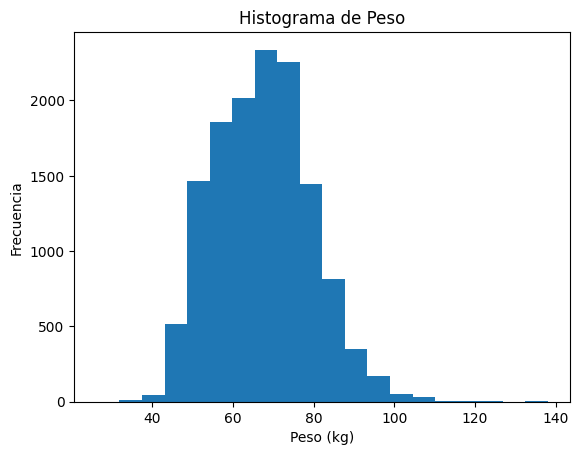

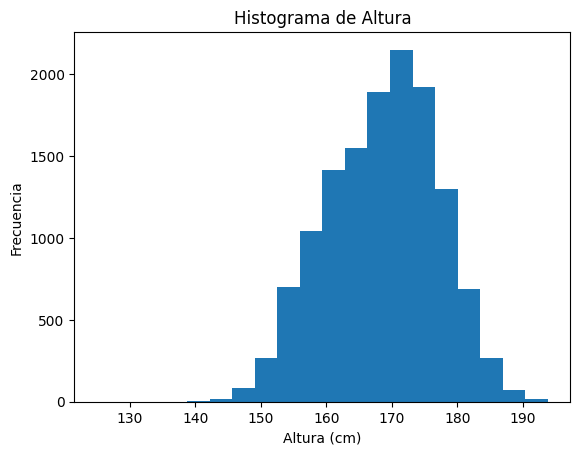

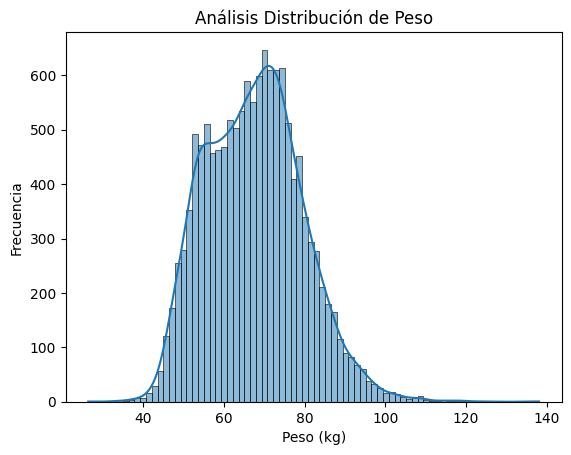

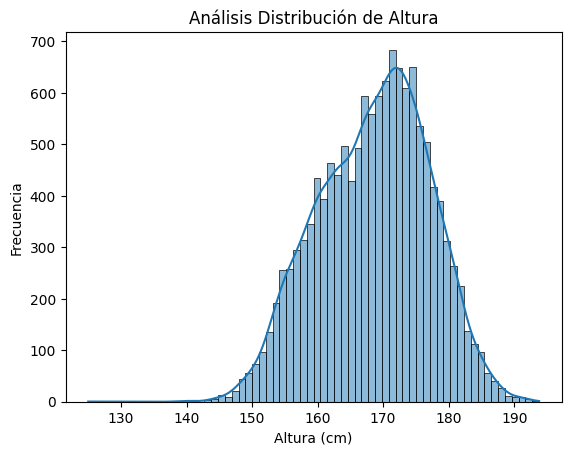

A simple vista, podemos ver que ninguna de las dos funciones adquieren una distribución normal perfecta aunque gracias a la función skew() podemos ver que tanto tienden a esa normalidad  o no según se acerquen a 0 (máxima normalidad). La añado a contuación.
Análisis de Sesgo en Peso:
0.34981028253972635
Análisis de Sesgo en Altura:
-0.18702929884607386
Podemos ver que la funcion de altura tiene una distribución más normal


In [6]:
#a) Realizar un histograma de la variable peso
plt.hist(data['weight_kg'], bins=20)
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso')
plt.show()
#b) Realizar un historama de la variable estatura
plt.hist(data['height_cm'], bins=20)
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Altura')
plt.show()
#c) Existe una distribución normal para cada variable?
sns.histplot(data['weight_kg'], kde=True)
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.title('Análisis Distribución de Peso')
plt.show()
sns.histplot(data['height_cm'], kde=True)
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.title('Análisis Distribución de Altura')
plt.show()

#d) Existe sesgo en alguna de estas dos variables ?
print("A simple vista, podemos ver que ninguna de las dos funciones adquieren una distribución normal perfecta aunque gracias a la función skew() podemos ver que tanto tienden a esa normalidad  o no según se acerquen a 0 (máxima normalidad). La añado a contuación.")
print("Análisis de Sesgo en Peso:")
print(data['weight_kg'].skew())
print("Análisis de Sesgo en Altura:")
print(data['height_cm'].skew())
print("Podemos ver que la funcion de altura tiene una distribución más normal")

5.-  0.4 pto  
a) Hacer un diagrama de cajas para la variable tensión sistólica  
b) Hacer un diagrama de cajas para la variable tensión diastólica  
c) Existen valores superiores atípicos en ambos casos y a partir de que valor?  
d) Cuál es el IQR para la variable presión diastólica?

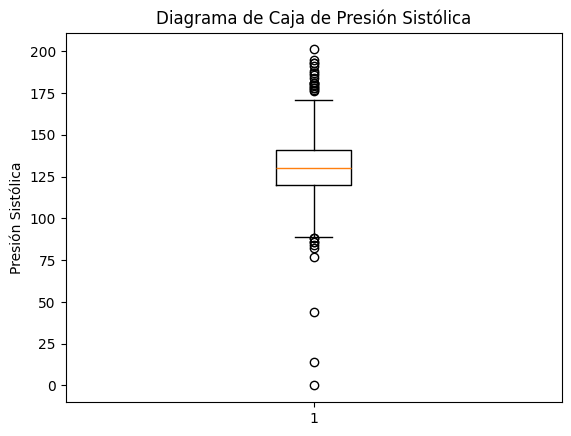

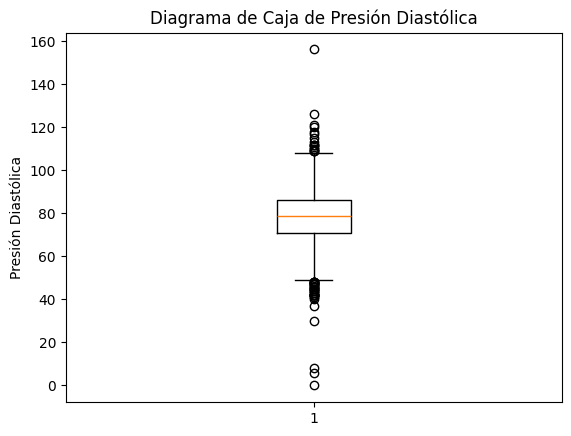

Si hay
Valores atipicos sup diast: 22.5
Valores atipicos sup sist: 31.5
El IQR para la variable presión diastólica es: 15.0
El IQR para la variable presión sistólica es: 21.0


In [7]:
#a) Hacer un diagrama de cajas para la variable tensión sistólica
plt.boxplot(data['systolic'])
plt.ylabel('Presión Sistólica')
plt.title('Diagrama de Caja de Presión Sistólica')
plt.show()
#b) Hacer un diagrama de cajas para la variable tensión diastólica
plt.boxplot(data['diastolic'])
plt.ylabel('Presión Diastólica')
plt.title('Diagrama de Caja de Presión Diastólica')
plt.show()

#c) Existen valores superiores atípicos en ambos casos y a partir de que valor?
print("Si hay")

q1s = data['systolic'].quantile(0.25)
q3s = data['systolic'].quantile(0.75)
iqrsistolic = q3s - q1s

q1d = data['diastolic'].quantile(0.25)
q3d = data['diastolic'].quantile(0.75)
iqrdiastolic = q3d - q1d
print("Valores atipicos sup diast:",1.5*iqrdiastolic)
print("Valores atipicos sup sist:",1.5*iqrsistolic)
#d) Cuál es el IQR para la variable presión diastólica?
print("El IQR para la variable presión diastólica es:", iqrdiastolic)
print("El IQR para la variable presión sistólica es:", iqrsistolic)

6.-  0.4 pto  
a) Queremos un gráfico de barras para la variable sit-ups count  
b) Hacer un gráfico para ver si las variables peso y grasa corporal están   relacionadas  
c) lo mismo para estatura y presión sistólica

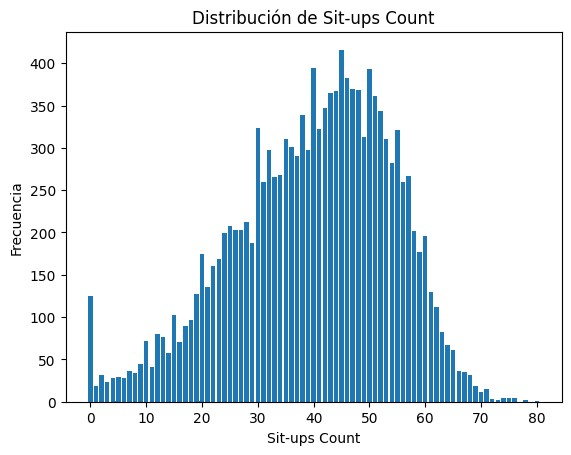

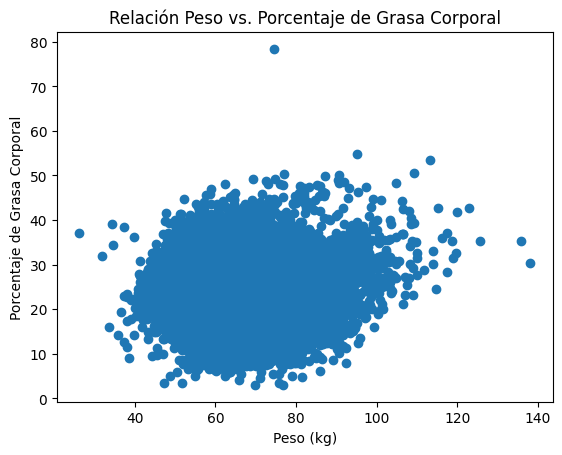

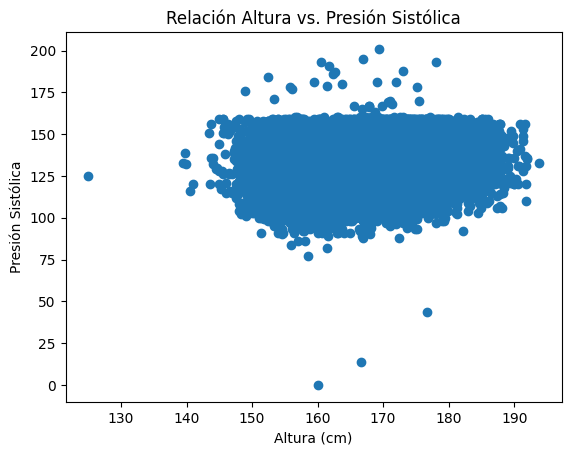

In [8]:
#a) Queremos un gráfico de barras para la variable sit-ups count
sit_ups_counts = data['sit-ups counts'].value_counts().sort_index()
plt.bar(sit_ups_counts.index, sit_ups_counts.values)
plt.xlabel('Sit-ups Count')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sit-ups Count')
plt.show()
#b) Hacer un gráfico para ver si las variables peso y grasa corporal están relacionadas
plt.scatter(data['weight_kg'], data['body fat_%'])
plt.xlabel('Peso (kg)')
plt.ylabel('Porcentaje de Grasa Corporal')
plt.title('Relación Peso vs. Porcentaje de Grasa Corporal')
plt.show()
#c) lo mismo para estatura y presión sistólica
plt.scatter(data['height_cm'], data['systolic'])
plt.xlabel('Altura (cm)')
plt.ylabel('Presión Sistólica')
plt.title('Relación Altura vs. Presión Sistólica')
plt.show()

In [ ]:
#7.- Existe correlación entre  las variables " estatura y presión sistólica" ?
# Si existe cuál es el valor de esta correlación ?
# Que conclusión podemos obtener de esta información ?

<Axes: xlabel='sit-ups counts', ylabel='class'>

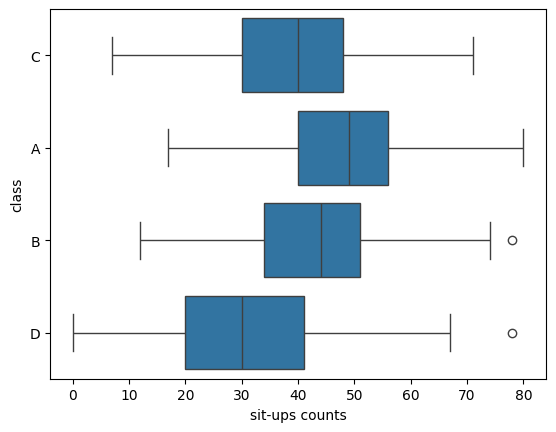

In [20]:
# 8 Hagamos un diagrama de cajas para ver la relación entre "Class" y "Sit-up counts"
# Qué clase de personas hacen mas sentadillas  y cuáles menos ?
sns.boxplot(y='class', x='sit-ups counts', data=data)

<Axes: xlabel='gripForce', ylabel='class'>

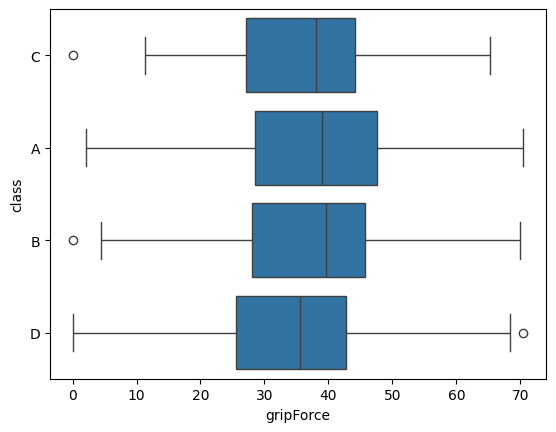

In [24]:
#9 lo mismo pero para las variables clase y "grip Force"
# Qué clase de personas hacen mas fuerza en el agarre  y cuáles menos ?
sns.boxplot(y='class', x='gripForce', data=data)


10.-   0.4 pto  
Calcular la matriz de correlación y hacer un mapa de calor para ver las correlaciones

matriz de correlación 
                               age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.294080  -0.100059    0.242372   
height_cm               -0.294080   1.000000   0.734868   -0.515392   
weight_kg               -0.100059   0.734868   1.000000   -0.083958   
body fat_%               0.242372  -0.515392  -0.083958    1.000000   
diastolic                0.158471   0.145863   0.262252    0.048125   
systolic                 0.211082   0.209963   0.338743   -0.030157   
gripForce               -0.179638   0.735007   0.700100   -0.541758   
sit and bend forward_cm -0.070007  -0.221933  -0.296217   -0.071269   
sit-ups counts          -0.544562   0.500551   0.295022   -0.609010   
broad jump_cm           -0.435217   0.674586   0.479546   -0.673264   

                         diastolic  systolic  gripForce  \
age                       0.158471  0.211082  -0.179638   
height_cm                 0.145863  0.209963   0.735007   
weight_kg        

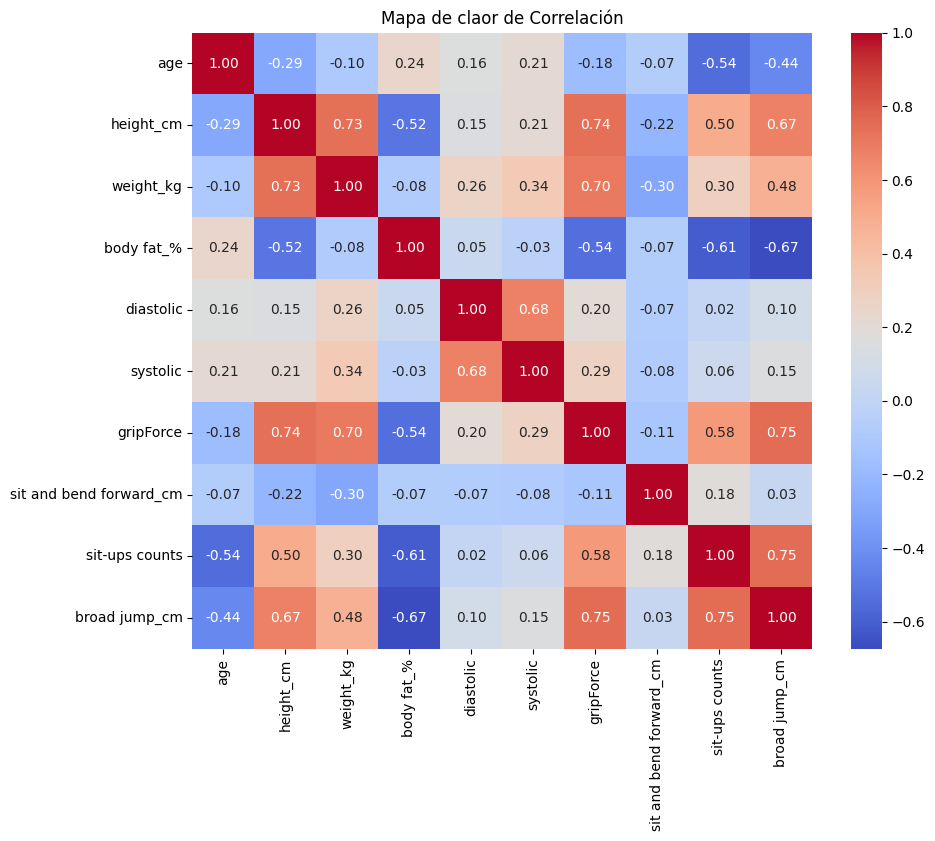

In [9]:
#Calcular la matriz de correlación y hacer un mapa de calor para ver las correlaciones
correlation_matrix = data.select_dtypes(include='number').corr()
print("matriz de correlación \n", correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de claor de Correlación')
plt.show()
